In [2]:
# Mounting Google Drive on Google Colab
""" Uncomment if working on Google Colab
from google.colab import drive
drive.mount('/content/drive',force_remount = True)
"""

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage.interpolation import zoom
from IPython.display import display
from PIL import Image
import cv2

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
# Initializing all paths - CHANGE BASE DIRECTORY W.R.T your file structure

base = r'/content/drive/My Drive/811Project/MM811'
image_path = os.path.join(base,'images')
image_path_all = os.path.join(base,'images_all')
image_path_add = os.path.join(base,'images_add')
path_to_code = os.path.join(base,'code')

In [5]:
import sys
sys.path.insert(0,path_to_code)
from cam import GradCAM, GradCAMPlusPlus, SmoothGradCAMPlusPlus
from model import base_model_VGG16, new_model_InceptionV3, new_model_Xception
from utils import visualize, cam



1.15.0
1.15.0


# Implementing CAMs on Different Classifiers

## Visualizing CAMs on Original Dataset(Pascal VOC) as GradCAM++

Class activation map by VGG16  for  Border_collie with Confidence:  67.48  %


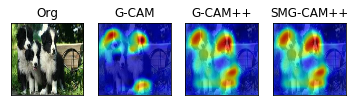

96116736/96112376 [==============================] - 2s 0us/step
Class activation map by InceptionV3  for  Border_collie with Confidence:  99.82  %


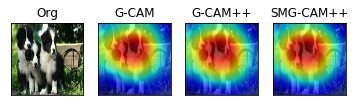

91889664/91884032 [==============================] - 1s 0us/step
Class activation map by Xception  for  Border_collie with Confidence:  90.88  %


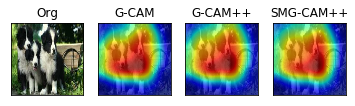

Class activation map by VGG16  for  borzoi with Confidence:  20.19  %


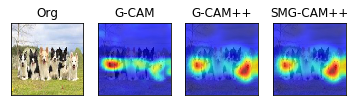

Class activation map by InceptionV3  for  wire-haired_fox_terrier with Confidence:  89.82  %


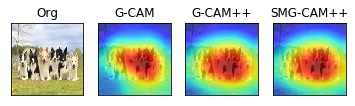

Class activation map by Xception  for  Norwich_terrier with Confidence:  49.42  %


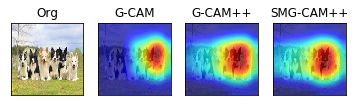

Class activation map by VGG16  for  sea_snake with Confidence:  53.46  %


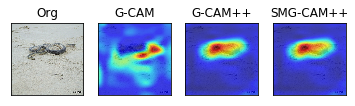

Class activation map by InceptionV3  for  sea_snake with Confidence:  98.73  %


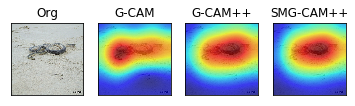

Class activation map by Xception  for  sea_snake with Confidence:  65.07  %


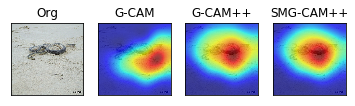

Class activation map by VGG16  for  spoonbill with Confidence:  99.99  %


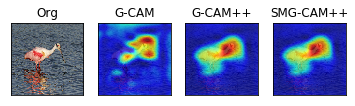

Class activation map by InceptionV3  for  spoonbill with Confidence:  100.0  %


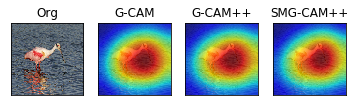

Class activation map by Xception  for  spoonbill with Confidence:  100.0  %


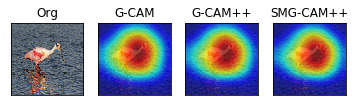

In [7]:
"""
Creating the Class Activation Mapping for all CAMS ON PASCAL-VOC DATA - SAME AS GRADCAM++ paper
"""

image_list = os.listdir(image_path)
N_SAMPLES = 10
STD_DEV = 0.15
ALPHA = 0.7

models = [base_model_VGG16,new_model_InceptionV3,new_model_Xception]
model_names = ["VGG16","InceptionV3","Xception"]
CAMs = [GradCAM,GradCAMPlusPlus,SmoothGradCAMPlusPlus]
CAM_names = ["GradCAM","GradCAMPP","SMGradPP"]

for images in image_list: 
    for i in range(len(models)):
        CAM_list = []
        for j in range(len(CAMs)):
            # Loading input image, changing dimensions for classifier input
            img = image.load_img(os.path.join(image_path,images), target_size=(224, 224))
            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)

            model_function = models[i]
            # Creating an instance of classifier model
            model,target_layer,prediction,decoded_y = model_function(X)        
            
            CAM_function = CAMs[j]
            if j == 2: # For Smooth Grad-CAM++
                CAM = cam(CAM_function,model,target_layer,prediction,X,N_SAMPLES,STD_DEV)
            else:
                CAM = cam(CAM_function,model,target_layer,prediction,X)
            CAM_list.append(CAM)
        count=0

        # Saving the CAMs locally as numpy array for future experiments
        for nparray in CAM_list:
            np.save(os.path.join(base,"Intermediate_results/CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[count]), nparray) 
            count += 1
            
            #print(len(CAM_list))
        print("Class activation map by", model_names[i]," for ",decoded_y[0][1], "with Confidence: ", np.round(decoded_y[0][2]*100,2), " %")
        
        # Visualizing the comparison grid
        comparison_grid = visualize(img,CAM_list[0],CAM_list[1],CAM_list[2], ALPHA)
        comparison_grid.savefig(os.path.join(base,"Results/Part1/CAM_"+str(ALPHA)+"_"+images[:-4]+"_"+model_names[i]+".png"))
        comparison_grid.show()

## Visualizing CAMS on Additional Dataset

40960/35363 [==================================] - 0s 0us/step
Class activation map by VGG16  for  boxer  with Confidence:  0.42014104  %


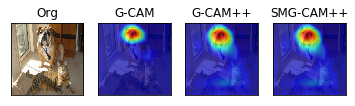

96116736/96112376 [==============================] - 2s 0us/step
Class activation map by InceptionV3  for  bull_mastiff  with Confidence:  0.96889704  %


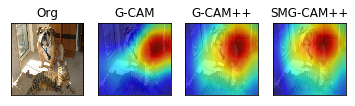

91889664/91884032 [==============================] - 1s 0us/step
Class activation map by Xception  for  bull_mastiff  with Confidence:  0.6990774  %


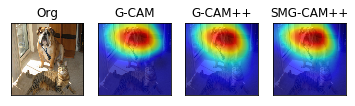

Class activation map by VGG16  for  tiger  with Confidence:  0.43517685  %


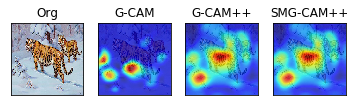

Class activation map by InceptionV3  for  tiger  with Confidence:  0.9573739  %


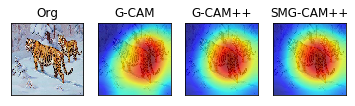

Class activation map by Xception  for  tiger  with Confidence:  0.8949344  %


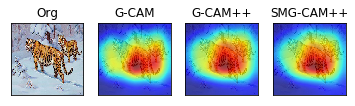

Class activation map by VGG16  for  tabby  with Confidence:  0.39809272  %


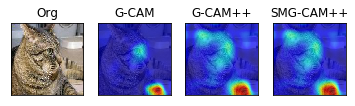

Class activation map by InceptionV3  for  tabby  with Confidence:  0.8164804  %


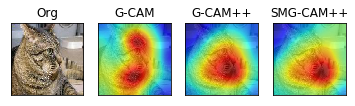

Class activation map by Xception  for  tabby  with Confidence:  0.8535077  %


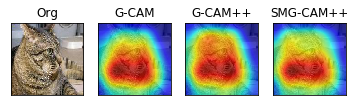

Class activation map by VGG16  for  tiger  with Confidence:  0.76219505  %


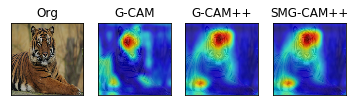

Class activation map by InceptionV3  for  tiger  with Confidence:  0.978782  %


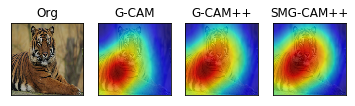

Class activation map by Xception  for  tiger  with Confidence:  0.9859503  %


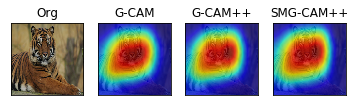

In [5]:
""" Creating Class Activations using CAMs on additional samples
"""
image_list = os.listdir(image_path_add)
N_SAMPLES = 10
STD_DEV = 0.15
ALPHA = 0.7

models = [base_model_VGG16,new_model_InceptionV3,new_model_Xception]
model_names = ["VGG16","InceptionV3","Xception"]
CAMs = [GradCAM,GradCAMPlusPlus,SmoothGradCAMPlusPlus]
CAM_names = ["GradCAM","GradCAMPP","SMGradPP"]

for images in image_list: 
  for i in range(len(models)):
        CAM_list = []
        for j in range(len(CAMs)):
            img = image.load_img(os.path.join(image_path_add,images), target_size=(224, 224))
            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)

            model_function = models[i]
            model,target_layer,prediction,decoded_y = model_function(X)        
            
            CAM_function = CAMs[j]
            if j == 2:
                CAM = cam(CAM_function,model,target_layer,prediction,X,N_SAMPLES,STD_DEV)
            else:
                CAM = cam(CAM_function,model,target_layer,prediction,X)
            CAM_list.append(CAM)
        count=0

        # Saving the CAMs as numpy array for future experiments
        for nparray in CAM_list:
            np.save(os.path.join(base,"Intermediate_results/CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[count]), nparray)
            count += 1
            
            #print(len(CAM_list))
        print("Class activation map by", model_names[i]," for ",decoded_y[0][1], " with Confidence: ", decoded_y[0][2]," %")

        # Visualizing the CAMS in a comparison grid
        comparison_grid = visualize(img,CAM_list[0],CAM_list[1],CAM_list[2], ALPHA)
        comparison_grid.savefig(os.path.join(base,"Results/Part1/CAM_"+str(ALPHA)+"_"+images[:-4]+"_"+model_names[i]+".png"))
        comparison_grid.show()

# Evaluation and Analysis of Part 1 Results

## Analysis 1: Predicting the explanation maps by Original Classifier

Prediction by  VGG16
_______________________________

Original: boxer with  42.01  %
GradCAM : boxer with  11.2  %


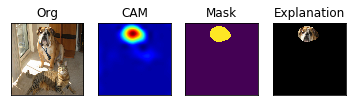

GradCAMPP : boxer with  23.65  %


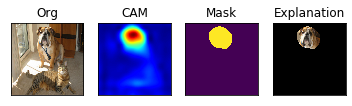

SMGradPP : boxer with  23.65  %


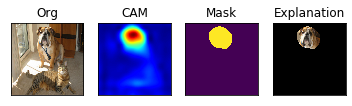

Prediction by  InceptionV3
_______________________________

Original: bull_mastiff with  96.89  %
GradCAM : Chihuahua with  53.23  %


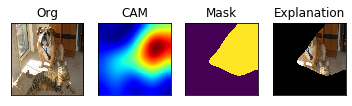

GradCAMPP : bull_mastiff with  84.79  %


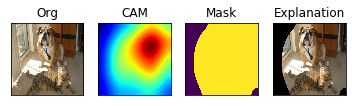

SMGradPP : bull_mastiff with  96.91  %


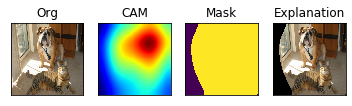

Prediction by  Xception
_______________________________

Original: bull_mastiff with  69.91  %
GradCAM : boxer with  92.96  %


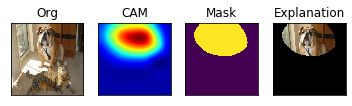

GradCAMPP : bull_mastiff with  70.34  %


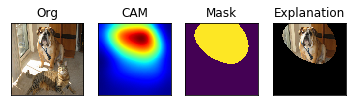

SMGradPP : bull_mastiff with  63.61  %


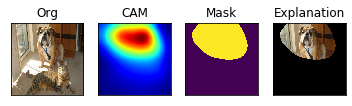

Prediction by  VGG16
_______________________________

Original: Border_collie with  67.48  %
GradCAM : pick with  45.79  %


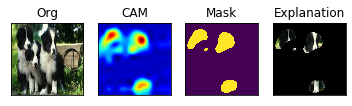

GradCAMPP : Great_Dane with  17.75  %


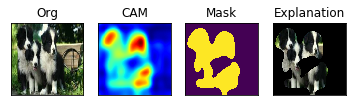

SMGradPP : Great_Dane with  17.75  %


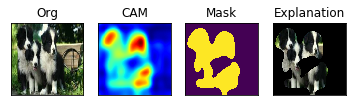

Prediction by  InceptionV3
_______________________________

Original: Border_collie with  99.82  %
GradCAM : Border_collie with  93.95  %


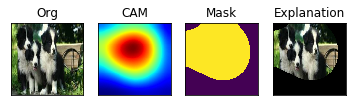

GradCAMPP : Border_collie with  99.64  %


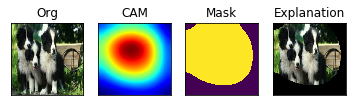

SMGradPP : Border_collie with  98.76  %


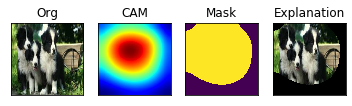

Prediction by  Xception
_______________________________

Original: Border_collie with  90.88  %
GradCAM : Border_collie with  88.16  %


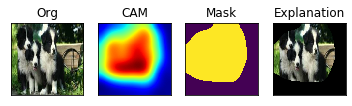

GradCAMPP : Border_collie with  90.19  %


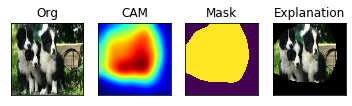

SMGradPP : Border_collie with  89.54  %


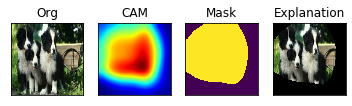

Prediction by  VGG16
_______________________________

Original: borzoi with  20.19  %
GradCAM : Sealyham_terrier with  14.25  %


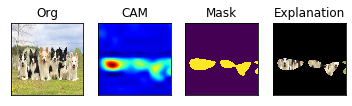

GradCAMPP : borzoi with  66.51  %


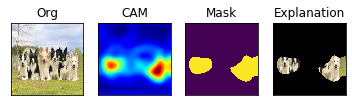

SMGradPP : borzoi with  68.03  %


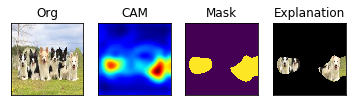

Prediction by  InceptionV3
_______________________________

Original: wire-haired_fox_terrier with  89.82  %
GradCAM : wire-haired_fox_terrier with  96.92  %


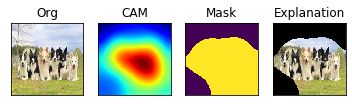

GradCAMPP : wire-haired_fox_terrier with  99.02  %


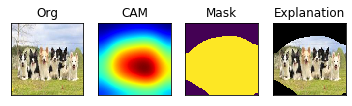

SMGradPP : wire-haired_fox_terrier with  98.99  %


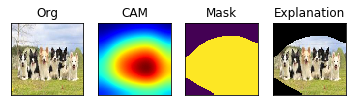

Prediction by  Xception
_______________________________

Original: Norwich_terrier with  49.42  %
GradCAM : Egyptian_cat with  14.17  %


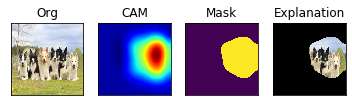

GradCAMPP : caldron with  72.89  %


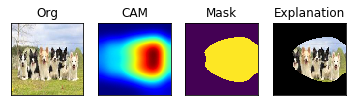

SMGradPP : Band_Aid with  79.89  %


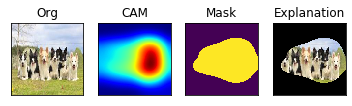

In [0]:
"""
Evaluating the explanation maps by Original Classifier
"""
import pandas as pd

image_list = os.listdir(image_path_all)
N_SAMPLES = 10
STD_DEV = 0.15
ALPHA = 0.7

models = [base_model_VGG16,new_model_InceptionV3,new_model_Xception]
model_names = ["VGG16","InceptionV3","Xception"]
CAMs = [GradCAM,GradCAMPlusPlus,SmoothGradCAMPlusPlus]
CAM_names = ["GradCAM","GradCAMPP","SMGradPP"]
columns = ["Imagename","Classifier","CAM","Classname","Classnumber","Prediction"]
col1,col2,col3,col4,col5,col6 = [],[],[],[],[],[]
prediction_df = pd.DataFrame(columns=columns)

for images in image_list: 
    
    for i in range(len(models)):
        img = image.load_img(os.path.join(image_path_all,images), target_size=(224, 224))
        X1 = image.img_to_array(img)
        X1 = np.expand_dims(X1, axis=0)
        CAM_list = []
        model_function = models[i]

        # Predicting original image by original classifier
        model,target_layer,prediction1,decoded_y1 = model_function(X1)
        print("Prediction by ",model_names[i])
        print("_______________________________")
        print("\nOriginal:",decoded_y1[0][1], "with ", np.round(decoded_y1[0][2]*100,2)," %")
        count = 0

        # Adding the values to lists to be appended to dataframe
        col1.append(images[:-4])
        col2.append(model_names[i])
        col3.append("Original")
        col4.append(decoded_y1[0][0])
        col5.append(decoded_y1[0][1])
        col6.append(decoded_y1[0][2])
        for j in range(len(CAMs)):
            #CAM_list.append(np.load("CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[count]))
            
            # Loading the CAMs numpy array for each image/model/CAM combination            
            CAM = np.load(os.path.join(base,"Intermediate_results/CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[j]+".npy"))
            ret,th = cv2.threshold(CAM,0.35,255,cv2.THRESH_BINARY) # Binary threshold
            mask = np.dstack([(th > 0)]*3) # Creating mask
            explanation = np.zeros((224, 224,3), dtype=np.uint8) 
            np.copyto(explanation, img, where=mask) # Copying image pixels on mask
            X2 = np.expand_dims(explanation, axis=0)

            # Predicting Explanations by Original Classifier
            model,target_layer,prediction2,decoded_y2 = model_function(X2)
            
            count += 1
            # Adding the values to lists to be appended to dataframe
            col1.append(images[:-4])
            col2.append(model_names[i])
            col3.append(CAM_names[j])
            col4.append(decoded_y2[0][0])
            col5.append(decoded_y2[0][1])
            col6.append(decoded_y2[0][2])

            # Visualizing the comparison grid of analysis
            print(CAM_names[j],":",decoded_y2[0][1], "with ", np.round(decoded_y2[0][2]*100,2)," %")
            plt.subplot(141)
            plt.title("Org")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(img)
            plt.subplot(142)
            plt.title("CAM")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(CAM,cmap="jet")
            plt.subplot(143)
            plt.title("Mask")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(th)
            plt.subplot(144)
            plt.title("Explanation")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(explanation)
            plt.show()
            plt.savefig(os.path.join(base,"Results/Part1/Explanation_"+"_"+images[:-4]+"_"+model_names[i]+"_"+CAM_names[j]+".png"))

# Creating a dataframe with all the information collected on lists
prediction_df = pd.DataFrame({"Imagename":col1,"Classifier":col2,"CAM":col3,"Classname":col4,"Classnumber":col5,"Prediction":col6})    
filename = os.path.join(base,"Results/Part1/Explanations.xlsx")

# Exporting the dataframe as excel
prediction_df.to_excel(filename, index = False, header = True)

## Analysis 2: Predicting the Explanation maps by VGG16

Original Prediction by VGG16 for  cat_dog
Class:  boxer    Confidence:  42.01  %
VGG16 Prediction on  GradCAM Explanation by  VGG16
Class:  boxer    Confidence:  11.2  %


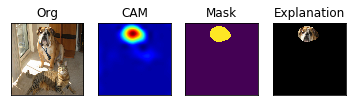

VGG16 Prediction on  GradCAMPP Explanation by  VGG16
Class:  boxer    Confidence:  23.65  %


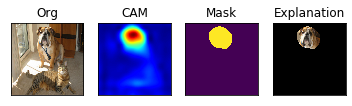

VGG16 Prediction on  SMGradPP Explanation by  VGG16
Class:  boxer    Confidence:  23.65  %


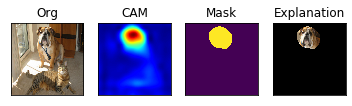

________________________________________________
Original Prediction by VGG16 for  cat_dog
Class:  boxer    Confidence:  42.01  %
VGG16 Prediction on  GradCAM Explanation by  InceptionV3
Class:  abaya    Confidence:  10.74  %


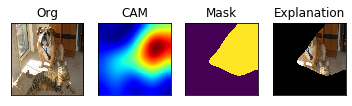

VGG16 Prediction on  GradCAMPP Explanation by  InceptionV3
Class:  boxer    Confidence:  20.08  %


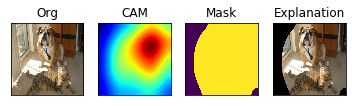

VGG16 Prediction on  SMGradPP Explanation by  InceptionV3
Class:  boxer    Confidence:  39.11  %


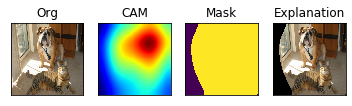

________________________________________________
Original Prediction by VGG16 for  cat_dog
Class:  boxer    Confidence:  42.01  %
VGG16 Prediction on  GradCAM Explanation by  Xception
Class:  Great_Dane    Confidence:  38.78  %


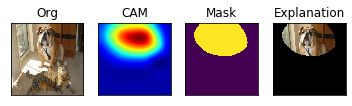

VGG16 Prediction on  GradCAMPP Explanation by  Xception
Class:  boxer    Confidence:  42.26  %


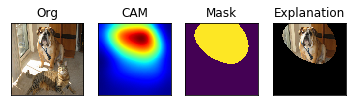

VGG16 Prediction on  SMGradPP Explanation by  Xception
Class:  boxer    Confidence:  44.8  %


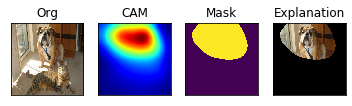

________________________________________________
Original Prediction by VGG16 for  collies
Class:  Border_collie    Confidence:  67.48  %
VGG16 Prediction on  GradCAM Explanation by  VGG16
Class:  pick    Confidence:  45.79  %


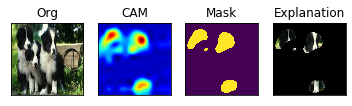

VGG16 Prediction on  GradCAMPP Explanation by  VGG16
Class:  Great_Dane    Confidence:  17.75  %


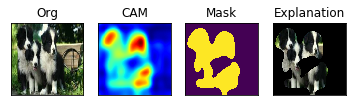

VGG16 Prediction on  SMGradPP Explanation by  VGG16
Class:  Great_Dane    Confidence:  17.75  %


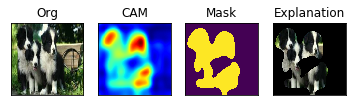

________________________________________________
Original Prediction by VGG16 for  collies
Class:  Border_collie    Confidence:  67.48  %
VGG16 Prediction on  GradCAM Explanation by  InceptionV3
Class:  Border_collie    Confidence:  51.71  %


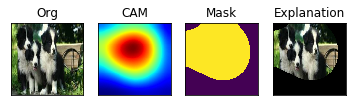

VGG16 Prediction on  GradCAMPP Explanation by  InceptionV3
Class:  Border_collie    Confidence:  45.79  %


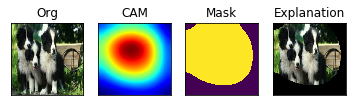

VGG16 Prediction on  SMGradPP Explanation by  InceptionV3
Class:  Border_collie    Confidence:  44.15  %


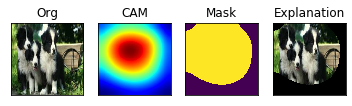

________________________________________________
Original Prediction by VGG16 for  collies
Class:  Border_collie    Confidence:  67.48  %
VGG16 Prediction on  GradCAM Explanation by  Xception
Class:  Border_collie    Confidence:  52.0  %


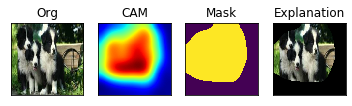

VGG16 Prediction on  GradCAMPP Explanation by  Xception
Class:  Border_collie    Confidence:  55.4  %


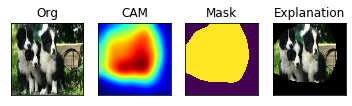

VGG16 Prediction on  SMGradPP Explanation by  Xception
Class:  Border_collie    Confidence:  54.4  %


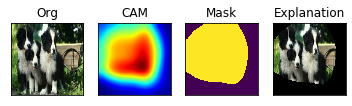

________________________________________________
Original Prediction by VGG16 for  multiple_dogs
Class:  borzoi    Confidence:  20.19  %
VGG16 Prediction on  GradCAM Explanation by  VGG16
Class:  Sealyham_terrier    Confidence:  14.25  %


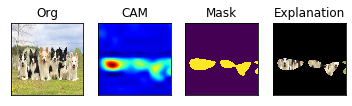

VGG16 Prediction on  GradCAMPP Explanation by  VGG16
Class:  borzoi    Confidence:  66.51  %


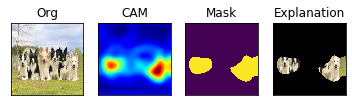

VGG16 Prediction on  SMGradPP Explanation by  VGG16
Class:  borzoi    Confidence:  68.03  %


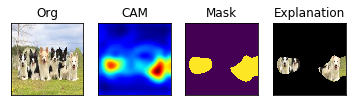

________________________________________________
Original Prediction by VGG16 for  multiple_dogs
Class:  borzoi    Confidence:  20.19  %
VGG16 Prediction on  GradCAM Explanation by  InceptionV3
Class:  borzoi    Confidence:  25.57  %


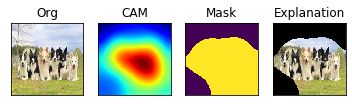

VGG16 Prediction on  GradCAMPP Explanation by  InceptionV3
Class:  borzoi    Confidence:  36.15  %


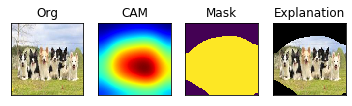

VGG16 Prediction on  SMGradPP Explanation by  InceptionV3
Class:  borzoi    Confidence:  44.6  %


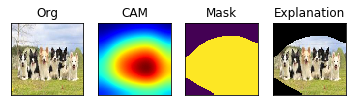

________________________________________________
Original Prediction by VGG16 for  multiple_dogs
Class:  borzoi    Confidence:  20.19  %
VGG16 Prediction on  GradCAM Explanation by  Xception
Class:  weasel    Confidence:  45.59  %


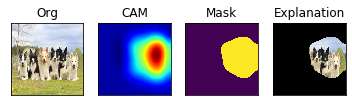

VGG16 Prediction on  GradCAMPP Explanation by  Xception
Class:  Ibizan_hound    Confidence:  11.85  %


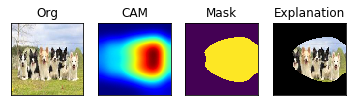

VGG16 Prediction on  SMGradPP Explanation by  Xception
Class:  borzoi    Confidence:  22.22  %


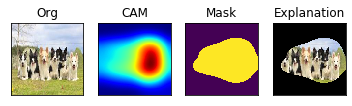

________________________________________________
Original Prediction by VGG16 for  snake
Class:  sea_snake    Confidence:  53.46  %
VGG16 Prediction on  GradCAM Explanation by  VGG16
Class:  electric_ray    Confidence:  30.92  %


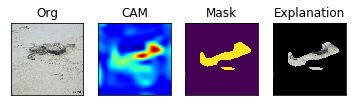

VGG16 Prediction on  GradCAMPP Explanation by  VGG16
Class:  nematode    Confidence:  54.88  %


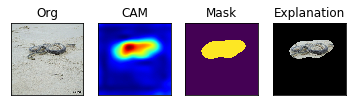

VGG16 Prediction on  SMGradPP Explanation by  VGG16
Class:  nematode    Confidence:  54.88  %


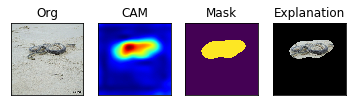

________________________________________________
Original Prediction by VGG16 for  snake
Class:  sea_snake    Confidence:  53.46  %
VGG16 Prediction on  GradCAM Explanation by  InceptionV3
Class:  hognose_snake    Confidence:  22.77  %


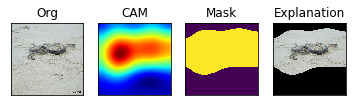

VGG16 Prediction on  GradCAMPP Explanation by  InceptionV3
Class:  sea_snake    Confidence:  27.66  %


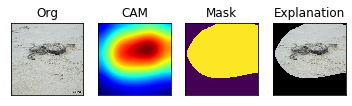

VGG16 Prediction on  SMGradPP Explanation by  InceptionV3
Class:  sea_snake    Confidence:  32.09  %


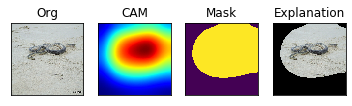

________________________________________________


In [0]:
"""
Evaluating the explanation maps by VGG16
"""
import pandas as pd

image_list = os.listdir(image_path_all)
N_SAMPLES = 10
STD_DEV = 0.15
ALPHA = 0.7

models = [base_model_VGG16,new_model_InceptionV3,new_model_Xception]
model_names = ["VGG16","InceptionV3","Xception"]
CAMs = [GradCAM,GradCAMPlusPlus,SmoothGradCAMPlusPlus]
CAM_names = ["GradCAM","GradCAMPP","SMGradPP"]
columns = ["Imagename","Classifier","CAM","Classnumber","Classname","Prediction"]
col1,col2,col3,col4,col5,col6 = [],[],[],[],[],[]
prediction_df = pd.DataFrame(columns=columns)

for images in image_list: 
    
    for i in range(len(models)):
        img = image.load_img(os.path.join(image_path_all,images), target_size=(224, 224))
        X1 = image.img_to_array(img)
        X1 = np.expand_dims(X1, axis=0)
        CAM_list = []
        model_function = models[i]
        model,target_layer,prediction1,decoded_y1 = base_model_VGG16(X1)
        print("Original Prediction by VGG16 for ", images[:-4])
        print("Class: ", decoded_y1[0][1], "   Confidence: ", np.round(decoded_y1[0][2]*100,2)," %")
        count = 0
        col1.append(images[:-4])
        col2.append("VGG16")
        col3.append("Original")
        col4.append(decoded_y1[0][0])
        col5.append(decoded_y1[0][1])
        col6.append(decoded_y1[0][2])
        for j in range(len(CAMs)):
            #CAM_list.append(np.load("CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[count]))
            CAM = np.load(os.path.join(base,"Intermediate_results/CAM_Part1_"+images+"_"+model_names[i]+"_"+CAM_names[j]+".npy"))
            ret,th = cv2.threshold(CAM,0.35,255,cv2.THRESH_BINARY)
            mask = np.dstack([(th > 0)]*3)
            explanation = np.zeros((224, 224,3), dtype=np.uint8)
            np.copyto(explanation, img, where=mask)
            X2 = np.expand_dims(explanation, axis=0)
            model,target_layer,prediction2,decoded_y2 = base_model_VGG16(X2)
            print("VGG16 Prediction on ",CAM_names[j],"Explanation by ",model_names[i])
            print("Class: ", decoded_y2[0][1], "   Confidence: ", np.round(decoded_y2[0][2]*100,2)," %") 

            count += 1
            col1.append(images[:-4])
            col2.append(model_names[i])
            col3.append(CAM_names[j])
            col4.append(decoded_y2[0][0])
            col5.append(decoded_y2[0][1])
            col6.append(decoded_y2[0][2])

            # print(CAM_names[j],":",decoded_y2[0][1], "with ", np.round(decoded_y2[0][2]*100,2)," %")
            plt.subplot(141)
            plt.title("Org")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(img)
            plt.subplot(142)
            plt.title("CAM")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(CAM,cmap="jet")
            plt.subplot(143)
            plt.title("Mask")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(th)
            plt.subplot(144)
            plt.title("Explanation")
            plt.xticks([], [])
            plt.yticks([], [])
            plt.imshow(explanation)
            plt.show()
            plt.savefig(os.path.join(base,"Results/Part1/Explanation_"+"_"+images[:-4]+"_"+model_names[i]+"_"+CAM_names[j]+".png"))
        print("________________________________________________")
            
prediction_df = pd.DataFrame({"Imagename":col1,"Classifier":col2,"CAM":col3,"Classname":col4,"Classnumber":col5,"Prediction":col6})    
filename = os.path.join(base,"Results/Part1/Explanations_VGG16.xlsx")
prediction_df.to_excel(filename, index = False, header = True)